About the data

https://www.kaggle.com/jangot/ligue1-match-statistics/data

Match Statistics from top 5 European Leagues
Italy, Spain, England, Germany, France 2012-2017

by Jemilu Mohammed
last updated 3 months ago

In [300]:
# imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sys

from scipy import spatial
from sklearn import metrics
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVR


In [301]:
# methods
def normalize(df):
    df_norm = df
    df_norm -= df_norm.min()
    df_norm /= df_norm.max() - df_norm.min()
    return df_norm

def filterData(df, managerSurname, homeOrAway):
    if ('home' == homeOrAway):
        return df[df['homeManagerName'].str.contains(managerSurname)]
    elif ('away' == homeOrAway):
        return df[df['awayManagerName'].str.contains(managerSurname)]
    else:
        return df

def populatePoint(goalDiff):
    if (goalDiff > 0):
        return 3
    elif (goalDiff == 0):
        return 1
    else:
        return 0

def computeDistance(stat1, stat2):
    statDistance = spatial.distance.cosine(stat1, stat2) # Calculating distance here
    return statDistance


In [302]:
# input parameters
managerSurname = 'Guardiola'
threshold = 3


In [303]:
# read data from csv
fullStatDF = pd.read_csv("data/FootballEurope.csv")
#fullStatDF.dtypes

C:\devtool\app\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (39,61) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [304]:
# clean data
fullStatDF = fullStatDF.dropna(how='any')
#fullStatDF2 = fullStatDF.copy(deep=True)

In [305]:
# filter data: specific manager, home or away
managerHomeDF = filterData(fullStatDF, managerSurname, 'home')
managerAwayDF = filterData(fullStatDF, managerSurname, 'away')


In [306]:
managerHomeDF['awayGoalFT'] = managerHomeDF['awayGoalFT'].apply(lambda x : int(x))
managerHomeDF['homeGoalFT'] = managerHomeDF['homeGoalFT'].apply(lambda x : int(x))

# homeGoal = managerHomeDF['homeGoalFT'].values.tolist()
# homeGoal = list(homeGoalFT)
# awayGoal = managerHomeDF['awayGoalFT'].values.tolist()
# awayGoal = list(homeGoalFT)
# idx = []
# for i in awayGoal:
#     for _ in i:
#         if type(_) == int:
#             idx.append(awayGoal.index(i))
# print(idx)
# # print(homeGoal)

C:\devtool\app\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\devtool\app\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [307]:
managerHomeDF['goalDiff'] = managerHomeDF['homeGoalFT'] - managerHomeDF['awayGoalFT']
managerHomeDF['points'] = managerHomeDF['goalDiff'].apply(populatePoint)

managerAwayDF['goalDiff'] = managerAwayDF['awayGoalFT'] - managerAwayDF['homeGoalFT']
managerAwayDF['points'] = managerAwayDF['goalDiff'].apply(populatePoint)

#def winLoss(x):
#    if x > 0:
#        return 3
#    if x ==0:
#        return 1
#    else:
#        return 0
#managerHomeDF2['points'] = managerHomeDF2['goalDiff'].apply(winLoss)
#managerHomeDF2.head()

C:\devtool\app\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\devtool\app\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\devtool\app\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.

In [308]:
managerHomeDF.head()

,Unnamed: 0,id,homeTacklesTotalHT,homeShotsTotalHT,awayDispossessedFT,awayPassSuccessFT,awayRatingsFT,awayDribbleSuccessFT,awayDribblesAttemptedHT,awayTeamLineUp,...,date,awayTacklesTotalFT,homeRatingsFT,homeDribblesAttemptedFT,homeTackleSuccessFT,awayPossessionFT,awayShotsTotalFT,division,goalDiff,points
1691,1692,1692,22,11,19.0,66.02,6.08,76.09,13,"Artur Boruc,Adam Smith,Simon Francis,Steve Coo...",...,2016-09-17,28,6.95,18.0,57.38,0.36,6.0,EPL,4,3
1692,1693,1693,12,5,5.0,56.56,6.27,72.22,8,"Tom Heaton,Matthew Lowton,Ben Mee,Michael Kean...",...,2017-01-02,24,6.46,20.0,53.85,0.45,11.0,EPL,1,3
1693,1694,1694,11,4,8.0,66.24,6.49,79.41,8,"Thibaut Courtois,David Luiz,César Azpilicueta,...",...,2016-12-03,27,6.33,14.0,46.00,0.39,10.0,EPL,-2,0
1696,1697,1697,12,14,14.0,61.77,6.16,31.82,6,"Eldin Jakupovic,Ahmed Elmohamady,Andrea Ranocc...",...,2017-04-08,32,6.71,17.0,86.23,0.33,7.0,EPL,2,3
1698,1699,1699,16,4,15.0,68.37,6.50,53.12,7,"Simon Mignolet,Nathaniel Clyne,Joel Matip,Ragn...",...,2017-03-19,45,6.40,30.0,73.81,0.40,13.0,EPL,0,1


In [309]:
# populate win/loss column
# managerHomeDF['point'] = managerHomeDF['point'.map(populateHomeGamePoint)
#pd.set_option('display.max_rows', 100)
#print(managerHomeDF.dtypes)

In [310]:
# fields interested
fieldsInterestedHome = ['awayManagerName', 'points', 'awayTackleSuccessFT', 'awayPossessionFT', 'awayPassesKeyFT', 'awayPassSuccessFT', 'awayCornersTotalFT', 'awayAerialsTotalFT', 'awayDribblesWonFT', 'awayDispossessedFT', 'awayOffsidesCaughtFT', 'awayInterceptionsFT', 'awayFoulsCommitedFT']
fieldsInterestedAway = ['homeManagerName', 'points', 'homeTackleSuccessFT', 'homePossessionFT', 'homePassesKeyFT', 'homePassSuccessFT', 'homeCornersTotalFT', 'homeAerialsTotalFT', 'homeDribblesWonFT', 'homeDispossessedFT', 'homeOffsidesCaughtFT', 'homeInterceptionsFT', 'homeFoulsCommitedFT']

# columns to apply feature scaling
scaleColumnsHome = ['points', 'awayTackleSuccessFT', 'awayPossessionFT', 'awayPassesKeyFT', 'awayPassSuccessFT', 'awayCornersTotalFT', 'awayAerialsTotalFT', 'awayDribblesWonFT', 'awayDispossessedFT', 'awayOffsidesCaughtFT', 'awayInterceptionsFT', 'awayFoulsCommitedFT']
scaleColumnsAway = ['points', 'homeTackleSuccessFT', 'homePossessionFT', 'homePassesKeyFT', 'homePassSuccessFT', 'homeCornersTotalFT', 'homeAerialsTotalFT', 'homeDribblesWonFT', 'homeDispossessedFT', 'homeOffsidesCaughtFT', 'homeInterceptionsFT', 'homeFoulsCommitedFT']


In [311]:
# narrow down fields
managerHomeDF = managerHomeDF[fieldsInterestedHome]
managerAwayDF = managerAwayDF[fieldsInterestedAway]


In [312]:
managerHomeDF.head()

,awayManagerName,points,awayTackleSuccessFT,awayPossessionFT,awayPassesKeyFT,awayPassSuccessFT,awayCornersTotalFT,awayAerialsTotalFT,awayDribblesWonFT,awayDispossessedFT,awayOffsidesCaughtFT,awayInterceptionsFT,awayFoulsCommitedFT
1691,Eddie Howe,3,58.33,0.36,6.0,66.02,5.0,9,21.0,19.0,2.0,15,11
1692,Sean Dyche,3,64.17,0.45,6.0,56.56,8.0,65,7.0,5.0,3.0,12,11
1693,Antonio Conte,0,65.22,0.39,9.0,66.24,2.0,19,16.0,8.0,1.0,17,9
1696,Marco Silva,3,66.67,0.33,5.0,61.77,3.0,21,5.0,14.0,2.0,22,8
1698,Jürgen Klopp,1,69.05,0.40,11.0,68.37,8.0,27,11.0,15.0,2.0,12,7


In [313]:
managerAwayDF.head()

,homeManagerName,points,homeTackleSuccessFT,homePossessionFT,homePassesKeyFT,homePassSuccessFT,homeCornersTotalFT,homeAerialsTotalFT,homeDribblesWonFT,homeDispossessedFT,homeOffsidesCaughtFT,homeInterceptionsFT,homeFoulsCommitedFT
1547,Eddie Howe,3,51.85,0.38,3,70.12,3.0,22,16.0,11,2.0,11,8
1566,Sean Dyche,3,84.62,0.33,7,47.22,5.0,53,5.0,11,4.0,19,8
1603,Alan Pardew,3,63.44,0.38,4,48.21,2.0,39,11.0,10,1.0,14,12
1622,Ronald Koeman,0,64.81,0.29,6,57.83,3.0,25,16.0,10,4.0,9,17
1641,Mike Phelan,3,75.49,0.33,5,59.14,4.0,29,7.0,10,2.0,17,11


In [314]:
managerHomeGroupedDF = managerHomeDF.groupby('awayManagerName', as_index=False).mean()
managerHomeGroupedDF = managerHomeGroupedDF.sort_values('points', ascending=True)

managerAwayGroupedDF = managerAwayDF.groupby('homeManagerName', as_index=False).mean()
managerAwayGroupedDF = managerAwayGroupedDF.sort_values('points', ascending=True)

In [315]:
managerHomeGroupedDF.head()

,awayManagerName,points,awayTackleSuccessFT,awayPossessionFT,awayPassesKeyFT,awayPassSuccessFT,awayCornersTotalFT,awayAerialsTotalFT,awayDribblesWonFT,awayDispossessedFT,awayOffsidesCaughtFT,awayInterceptionsFT,awayFoulsCommitedFT
4,Antonio Conte,0.0,65.22,0.39,9.0,66.24,2.0,19.0,16.0,8.0,1.0,17.0,9.0
0,Aitor Karanka,1.0,53.47,0.29,4.0,54.66,2.0,30.0,16.0,10.0,2.0,13.0,15.0
23,Mark Hughes,1.0,61.11,0.35,4.0,56.89,1.0,37.0,11.0,15.0,1.0,24.0,11.0
19,José Mourinho,1.0,64.33,0.31,2.0,53.40,4.0,18.0,12.0,9.0,1.0,16.0,8.0
9,Claude Puel,1.0,66.23,0.35,3.0,59.62,3.0,31.0,9.0,15.0,4.0,18.0,10.0


In [316]:
managerAwayGroupedDF.head()

,homeManagerName,points,homeTackleSuccessFT,homePossessionFT,homePassesKeyFT,homePassSuccessFT,homeCornersTotalFT,homeAerialsTotalFT,homeDribblesWonFT,homeDispossessedFT,homeOffsidesCaughtFT,homeInterceptionsFT,homeFoulsCommitedFT
34,Ronald Koeman,0.0,64.81,0.290,6.0,57.830,3.0,25.0,16.0,10.0,4.0,9.0,17.0
2,André Schubert,0.0,70.83,41.700,11.0,56.480,3.0,45.0,4.0,6.0,6.0,26.0,13.0
25,Mauricio Pochettino,0.0,56.72,0.420,7.0,56.460,4.0,24.0,12.0,20.0,8.0,14.0,20.0
33,Roger Schmidt,0.5,70.05,42.245,9.5,61.540,8.5,45.5,15.5,16.5,4.0,24.5,21.5
5,Christian Streich,0.5,63.23,27.840,5.5,54.535,2.5,28.0,8.5,12.0,2.5,16.0,16.5


In [317]:
#print(managerHomeDFGroup.columns)
managerHomeGroupedScaledDF = normalize(managerHomeGroupedDF[scaleColumnsHome])
#managerHomeGroupedScaledDF.insert(0, 'points', managerHomeGroupedDF[['points']])
managerHomeGroupedScaledDF.insert(0, 'awayManagerName', managerHomeGroupedDF[['awayManagerName']])

managerAwayGroupedScaledDF = normalize(managerAwayGroupedDF[scaleColumnsAway])
#managerAwayGroupedScaledDF.insert(0, 'points', managerAwayGroupedDF[['points']])
managerAwayGroupedScaledDF.insert(0, 'homeManagerName', managerAwayGroupedDF[['homeManagerName']])


In [318]:
managerHomeGroupedScaledDF.head()

,awayManagerName,points,awayTackleSuccessFT,awayPossessionFT,awayPassesKeyFT,awayPassSuccessFT,awayCornersTotalFT,awayAerialsTotalFT,awayDribblesWonFT,awayDispossessedFT,awayOffsidesCaughtFT,awayInterceptionsFT,awayFoulsCommitedFT
4,Antonio Conte,0.000000,0.837734,0.003691,0.583333,0.755659,0.250,0.178571,0.722222,0.315789,0.125,0.368421,0.133333
0,Aitor Karanka,0.333333,0.489172,0.001384,0.166667,0.396589,0.250,0.375000,0.722222,0.421053,0.250,0.157895,0.533333
23,Mark Hughes,0.333333,0.715811,0.002768,0.166667,0.465736,0.125,0.500000,0.444444,0.684211,0.125,0.736842,0.266667
19,José Mourinho,0.333333,0.811332,0.001845,0.000000,0.357519,0.500,0.160714,0.500000,0.368421,0.125,0.315789,0.066667
9,Claude Puel,0.333333,0.867695,0.002768,0.083333,0.550388,0.375,0.392857,0.333333,0.684211,0.500,0.421053,0.200000


In [319]:
managerHomeGroupedScaledDF.shape

(46, 13)

In [320]:
managerAwayGroupedScaledDF.head()

,homeManagerName,points,homeTackleSuccessFT,homePossessionFT,homePassesKeyFT,homePassSuccessFT,homeCornersTotalFT,homeAerialsTotalFT,homeDribblesWonFT,homeDispossessedFT,homeOffsidesCaughtFT,homeInterceptionsFT,homeFoulsCommitedFT
34,Ronald Koeman,0.000000,0.552215,0.000000,0.416667,0.506029,0.352941,0.142857,0.842105,0.444444,0.428571,0.156863,0.500000
2,André Schubert,0.000000,0.688291,0.902966,0.833333,0.451768,0.352941,0.551020,0.210526,0.222222,0.714286,0.823529,0.277778
25,Mauricio Pochettino,0.000000,0.369349,0.002835,0.500000,0.450965,0.470588,0.122449,0.631579,1.000000,1.000000,0.352941,0.666667
33,Roger Schmidt,0.166667,0.670660,0.914850,0.708333,0.655145,1.000000,0.561224,0.815789,0.805556,0.428571,0.764706,0.750000
5,Christian Streich,0.166667,0.516501,0.600741,0.375000,0.373593,0.294118,0.204082,0.447368,0.555556,0.214286,0.431373,0.472222


In [321]:
managerAwayGroupedScaledDF.shape

(46, 13)

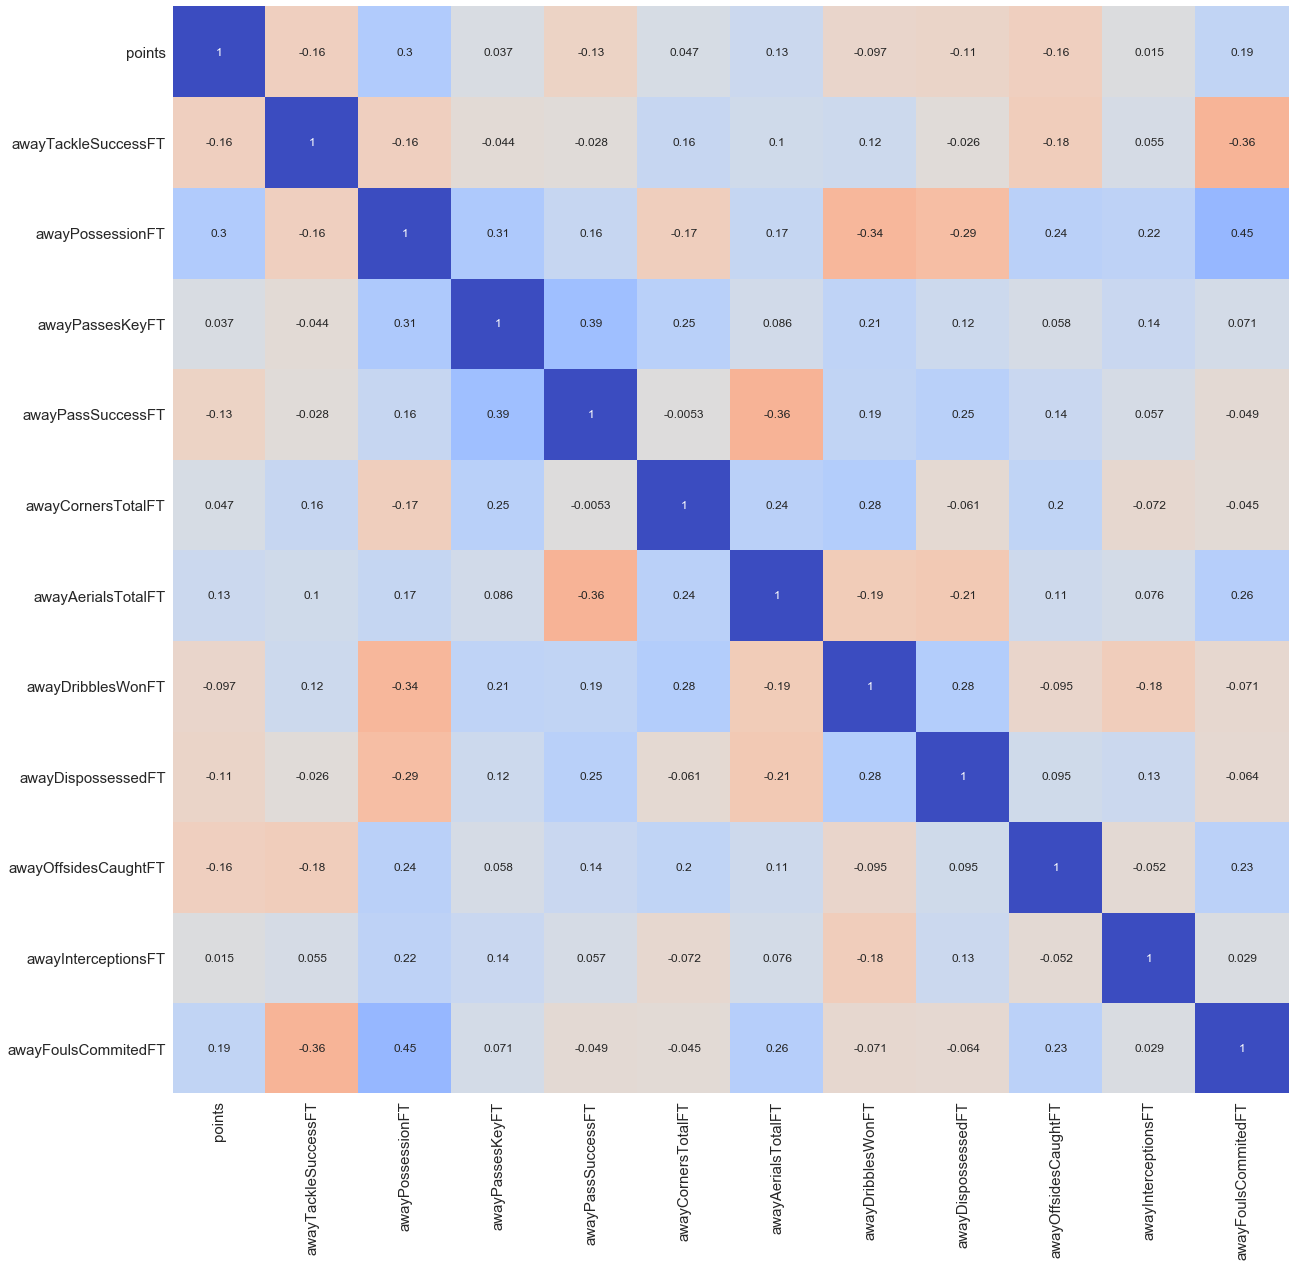

In [322]:
# Correlation Map: points gained VS opponents' statistics
correlations_map=managerHomeGroupedScaledDF.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(correlations_map,annot=True,cbar=False,cmap="coolwarm_r")
plt.xticks(rotation=90,fontsize=15)
plt.yticks(rotation=0,fontsize=15)
plt.show()


In [323]:
# Build Data Frame with points lower than threshold
managerHomeGroupedScaledBelowThresholdDF = managerHomeGroupedScaledDF[managerHomeGroupedScaledDF['points'] <= threshold]
managerHomeGroupedScaledBelowThresholdDF.shape

(46, 13)

In [324]:
managerAwayGroupedScaledBelowThresholdDF = managerAwayGroupedScaledDF[managerAwayGroupedScaledDF['points'] <= threshold]
managerAwayGroupedScaledBelowThresholdDF.shape

(46, 13)

In [325]:
# refine the interested fields list
fieldsInterestedHome = ['awayTackleSuccessFT', 'awayPassesKeyFT', 'awayPassSuccessFT', 'awayAerialsTotalFT', 'awayOffsidesCaughtFT', 'awayInterceptionsFT', 'awayFoulsCommitedFT']
fieldsInterestedAway = ['homeTackleSuccessFT', 'homePassesKeyFT', 'homePassSuccessFT', 'homeAerialsTotalFT', 'homeOffsidesCaughtFT', 'homeInterceptionsFT', 'homeFoulsCommitedFT']


In [326]:
# (Home games) for opponents under issue, calculate Distances between each record pair

managerHomeOpponentSimilarityRecord = []

tempReferenceRecord = managerHomeGroupedScaledBelowThresholdDF.iloc[0]
print('Reference Manager: ', tempReferenceRecord['awayManagerName'])

for i in range(len(managerHomeGroupedScaledBelowThresholdDF)):
    statDistance = computeDistance(tempReferenceRecord[fieldsInterestedHome].values.tolist(), managerHomeGroupedScaledBelowThresholdDF.iloc[i][fieldsInterestedHome].values.tolist())
    managerHomeOpponentSimilarityRecord.append([managerHomeGroupedScaledBelowThresholdDF.iloc[i]['awayManagerName'], managerHomeGroupedScaledBelowThresholdDF.iloc[i]['points'], statDistance])
    
print(managerHomeOpponentSimilarityRecord)

Reference Manager:  Antonio Conte
[['Antonio Conte', 0.0, 1.1102230246251565e-16], ['Aitor Karanka', 0.33333333333333331, 0.20670081341856783], ['Mark Hughes', 0.33333333333333331, 0.15227840101638779], ['José Mourinho', 0.33333333333333331, 0.13897930860896079], ['Claude Puel', 0.33333333333333331, 0.13855021862259831], ['Roberto Di Matteo', 0.33333333333333331, 0.42116968660731779], ['Mauricio Pochettino', 0.33333333333333331, 0.21889784161882586], ['André Schubert', 0.33333333333333331, 0.17903949623242965], ['Jürgen Klopp', 0.44444444444444442, 0.12819732559918184], ['Lucien Favre', 0.5, 0.085381850033993456], ['Martin Schmidt', 0.5, 0.19318860139669858], ['Markus Weinzierl', 0.66666666666666663, 0.12251353608786653], ['Markus Gisdol', 0.66666666666666663, 0.13881390480059996], ['Tony Pulis', 1.0, 0.2416297693603614], ['Michael Wiesinger', 1.0, 0.34691094222290475], ['Thomas Tuchel', 1.0, 0.088975824220165367], ['Mirko Slomka', 1.0, 0.17839682200158813], ['Tayfun Korkut', 1.0, 0.16

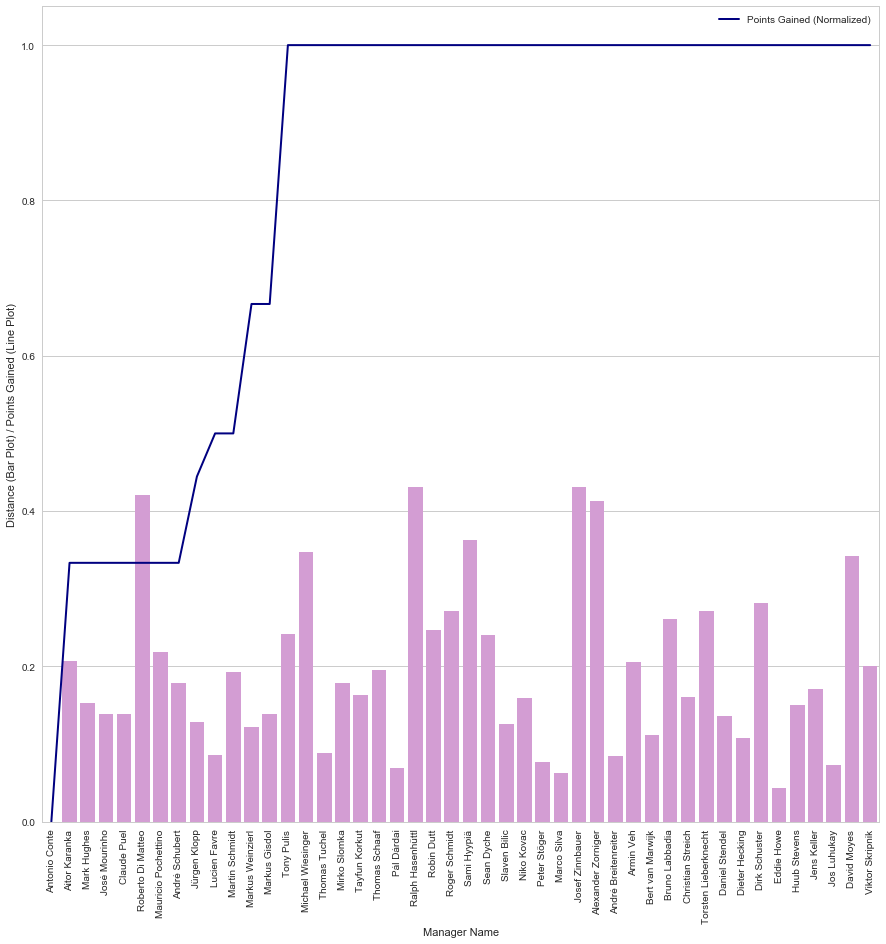

In [327]:
fig = plt.figure(figsize=(15,15))

sns.set_style("whitegrid")

plot1 = sns.barplot(x=[row[0] for row in managerHomeOpponentSimilarityRecord], y=[row[2] for row in managerHomeOpponentSimilarityRecord], color="violet", saturation=.5)
plt.plot(range(len(managerHomeOpponentSimilarityRecord)), [row[1] for row in managerHomeOpponentSimilarityRecord], color='navy', lw=2, label="Points Gained (Normalized)")

for item in plot1.get_xticklabels():
    item.set_rotation(90)

plt.xlabel('Manager Name')
plt.ylabel('Distance (Bar Plot) / Points Gained (Line Plot)')
#plt.title('Support Vector Regression')
plt.legend()
plt.show()
#print([row[0] for row in managerHomeOpponentSimilarityRecord])

In [298]:
# (Away games) for opponents under issue, calculate Distances between each record pair

managerAwayOpponentSimilarityRecord = []

tempReferenceRecord = managerAwayGroupedScaledBelowThresholdDF.iloc[2]
print('Reference Manager: ', tempReferenceRecord['homeManagerName'])

for i in range(len(managerAwayGroupedScaledBelowThresholdDF)):
    statDistance = computeDistance(tempReferenceRecord[fieldsInterestedAway].values.tolist(), managerAwayGroupedScaledBelowThresholdDF.iloc[i][fieldsInterestedAway].values.tolist())
    managerAwayOpponentSimilarityRecord.append([managerAwayGroupedScaledBelowThresholdDF.iloc[i]['homeManagerName'], managerAwayGroupedScaledBelowThresholdDF.iloc[i]['points'], statDistance])
    
print(managerAwayOpponentSimilarityRecord)



Reference Manager:  Steve McClaren
[['Kasper Hjulmand', 0.0, 0.24711646105851104], ['Thorsten Fink', 0.0, 0.23619122449736185], ['Steve McClaren', 0.0, 2.2204460492503131e-16], ['Peter Stöger', 0.0, 0.12109112301453928], ['Enrique Sánchez Flores', 0.0, 0.13980104668154336], ['Craig Shakespeare', 0.0, 0.1297462673373535], ['Claudio Ranieri', 0.0, 0.18511773696066314], ['Viktor Skripnik', 0.0, 0.30019683603536385], ['Lucien Favre', 0.1111111111111111, 0.086494802593666709], ['Mirko Slomka', 0.16666666666666666, 0.26850820728011826], ['Dieter Hecking', 0.16666666666666666, 0.29215560421245279], ['Markus Gisdol', 0.33333333333333331, 0.16393949708787381], ['André Breitenreiter', 0.33333333333333331, 0.10536349876463413], ['Michael Wiesinger', 0.33333333333333331, 0.36918034192457894], ['Mauricio Pochettino', 0.33333333333333331, 0.13622637887447542], ['Jupp Heynckes', 0.33333333333333331, 0.17847705948281634], ['Josef Zinnbauer', 0.33333333333333331, 0.47703978568012229], ['Jens Keller', 0

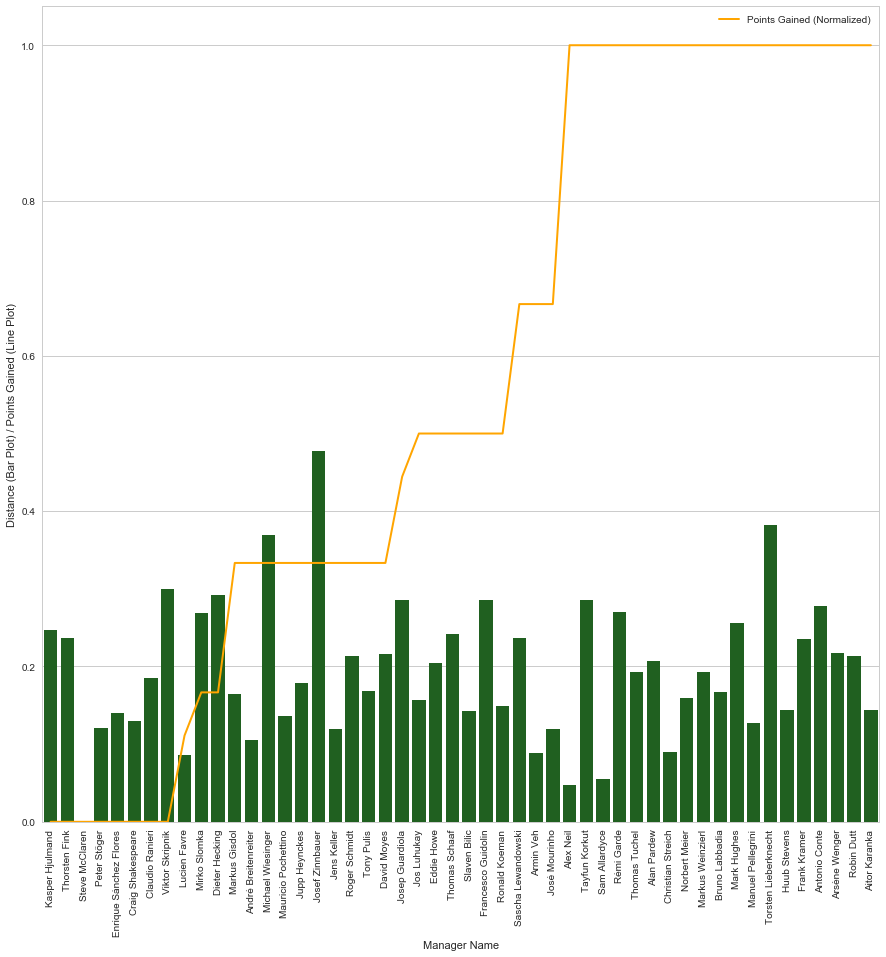

In [299]:
fig = plt.figure(figsize=(15,15))

sns.set_style("whitegrid")

plot1 = sns.barplot(x=[row[0] for row in managerAwayOpponentSimilarityRecord], y=[row[2] for row in managerAwayOpponentSimilarityRecord], color="green", saturation=.5)
plt.plot(range(len(managerAwayOpponentSimilarityRecord)), [row[1] for row in managerAwayOpponentSimilarityRecord], color='orange', lw=2, label="Points Gained (Normalized)")

for item in plot1.get_xticklabels():
    item.set_rotation(90)

plt.xlabel('Manager Name')
plt.ylabel('Distance (Bar Plot) / Points Gained (Line Plot)')
#plt.title('Support Vector Regression')
plt.legend()
plt.show()
#print([row[0] for row in managerHomeOpponentSimilarityRecord])